In [1]:
import sys
sys.path.append(r'C:\Users\festa\OneDrive\Desktop\Thesis\Thesis')
from functions import load_and_process_data, apply_bias_mitigation, evaluate_fairness_metrics, standardize_features, train_classifier_and_find_best_threshold, apply_best_threshold_and_compute_metrics, plot_metrics_dir, plot_metrics_aod, train_classifier_on_transformed_data, extract_fairness_metrics
from functions import train_classifier_with_dir, apply_DIR
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
train, val, test, privileged_groups, unprivileged_groups = load_and_process_data('adult', use_disparate_impact_remover=True)

In [3]:
train_transf, test_transf = apply_bias_mitigation('disparateimpactremover', train, test, unprivileged_groups, privileged_groups)


In [4]:
train_before_stat_parity_diff, train_before_disp_impact = evaluate_fairness_metrics(train, unprivileged_groups, privileged_groups, "Train Dataset (Before Transformation)")
test_before_stat_parity_diff, test_before_disp_impact = evaluate_fairness_metrics(test, unprivileged_groups, privileged_groups, "Test Dataset (Before Transformation)")

train_after_stat_parity_diff, train_after_disp_impact = evaluate_fairness_metrics(train_transf, unprivileged_groups, privileged_groups, "Train Dataset (After Transformation)")
test_after_stat_parity_diff, test_after_disp_impact = evaluate_fairness_metrics(test_transf, unprivileged_groups, privileged_groups, "Test Dataset (After Transformation)")

print("Train Dataset (Before Transformation) - Statistical Parity Difference:", train_before_stat_parity_diff)
print("Train Dataset (Before Transformation) - Disparate Impact:", train_before_disp_impact)
print("Test Dataset (Before Transformation) - Statistical Parity Difference:", test_before_stat_parity_diff)
print("Test Dataset (Before Transformation) - Disparate Impact:", test_before_disp_impact)

print("Train Dataset (After Transformation) - Statistical Parity Difference:", train_after_stat_parity_diff)
print("Train Dataset (After Transformation) - Disparate Impact:", train_after_disp_impact)
print("Test Dataset (After Transformation) - Statistical Parity Difference:", test_after_stat_parity_diff)
print("Test Dataset (After Transformation) - Disparate Impact:", test_after_disp_impact)


Train Dataset (Before Transformation) - Statistical Parity Difference: -0.1951
Train Dataset (Before Transformation) - Disparate Impact: 0.3572
Test Dataset (Before Transformation) - Statistical Parity Difference: -0.1893
Test Dataset (Before Transformation) - Disparate Impact: 0.3812
Train Dataset (After Transformation) - Statistical Parity Difference: -0.1951
Train Dataset (After Transformation) - Disparate Impact: 0.3572
Test Dataset (After Transformation) - Statistical Parity Difference: -0.1893
Test Dataset (After Transformation) - Disparate Impact: 0.3812


In [5]:
# Standardize the features (scaling)
train, val, test = standardize_features(train, val, test)

# Choose classifier type
classifier_type = 'xgboost'  # Change to 'random_forest' or 'xgboost'

# Train classifier
classifier, best_threshold, best_balanced_acc = train_classifier_and_find_best_threshold(train, val, classifier_type, unprivileged_groups, privileged_groups)


Best Threshold: 0.28
Best Balanced Accuracy: 0.7973791947090194


In [6]:
test_metrics, test_scores = apply_best_threshold_and_compute_metrics(classifier, test, best_threshold, unprivileged_groups, privileged_groups)

Balanced Accuracy (test): 0.7774027057848862
Statistical Parity Difference (test): -0.3654724723101545
Disparate Impact (test): 0.1751149690498544
Average Odds Difference (test): -0.3179008017786542
Equal Opportunity Difference (test): -0.38379340212397384
Theil Index (test): 0.10605229973775547


In [10]:
%matplotlib inline

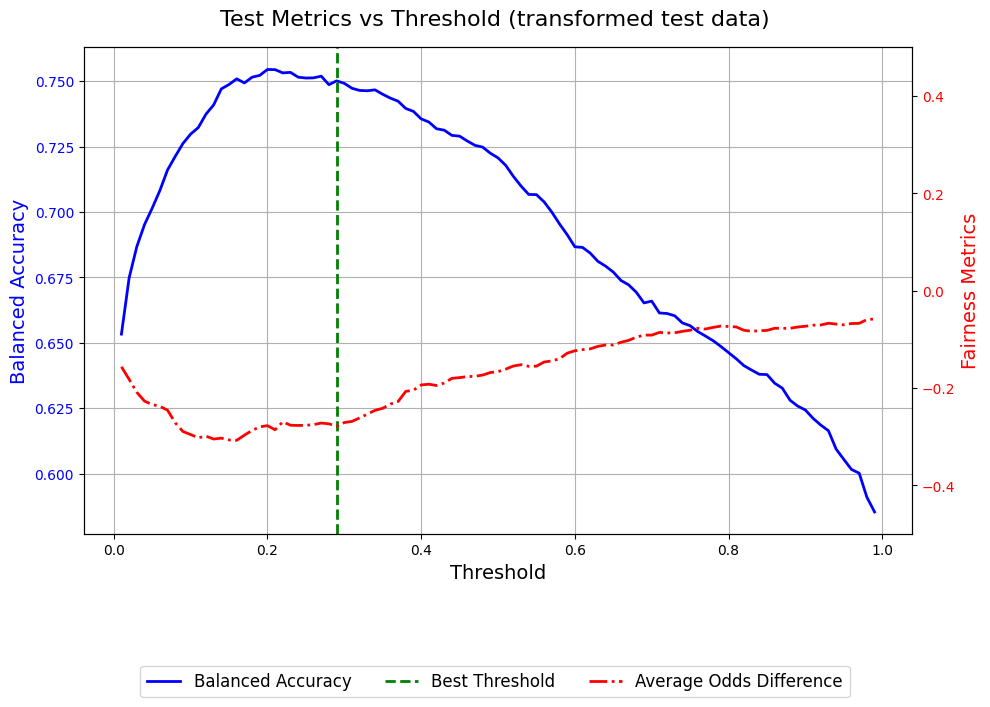

In [8]:
plot_metrics_aod(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)


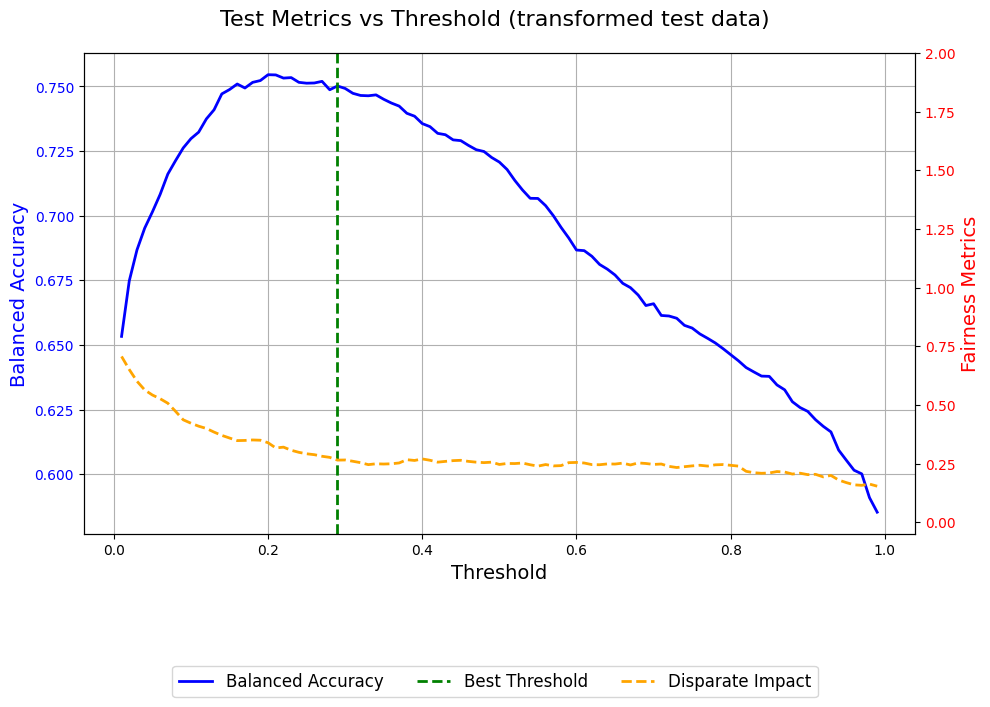

In [9]:
plot_metrics_dir(test, test_scores, best_threshold, unprivileged_groups, privileged_groups)

In [7]:
# Train classifier on transformed data and use the same threshold
classifier_type = 'xgboost'  # Change to 'random_forest' or 'xgboost'

test_transf_metrics_df = train_classifier_with_dir(
    train, test, classifier_type, best_threshold, unprivileged_groups, privileged_groups, sensitive_attribute="sex", repair_levels=np.linspace(0., 1., 11))


=== Repair Level: 0.0 ===

=== Repair Level: 0.1 ===

=== Repair Level: 0.2 ===

=== Repair Level: 0.30000000000000004 ===

=== Repair Level: 0.4 ===

=== Repair Level: 0.5 ===

=== Repair Level: 0.6000000000000001 ===

=== Repair Level: 0.7000000000000001 ===

=== Repair Level: 0.8 ===

=== Repair Level: 0.9 ===

=== Repair Level: 1.0 ===

Results for Various Repair Levels:
    Repair Level  Balanced Accuracy  Statistical Parity Difference  \
0            0.0           0.761473                      -0.155839   
1            0.1           0.748172                      -0.126479   
2            0.2           0.761140                      -0.297908   
3            0.3           0.760557                      -0.282949   
4            0.4           0.741257                      -0.180514   
5            0.5           0.742208                      -0.190106   
6            0.6           0.694340                      -0.116313   
7            0.7           0.687393                      -0.0

In [8]:
chosen_repair_level = 0.1
test_transf_classifier, test_transf_scores, test_transf_metrics = apply_DIR(train, test, chosen_repair_level, classifier_type, best_threshold, unprivileged_groups, privileged_groups, sensitive_attribute="sex")




=== Repair Level: 0.1 ===

Results for Various Repair Levels:
   Repair Level  Balanced Accuracy  Statistical Parity Difference  \
0           0.1           0.748172                      -0.126479   

   Disparate Impact  Average Odds Difference  Equal Opportunity Difference  \
0          0.585384                -0.037933                     -0.043609   

   Theil Index  
0     0.126667  


In [11]:
%matplotlib inline

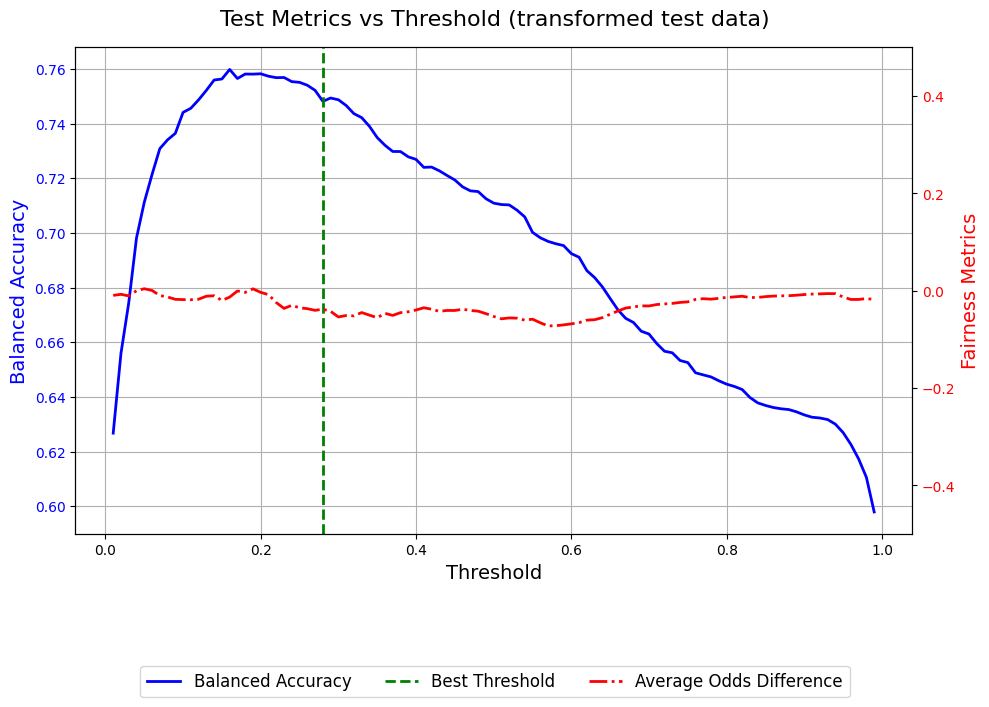

In [13]:
plot_metrics_aod(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

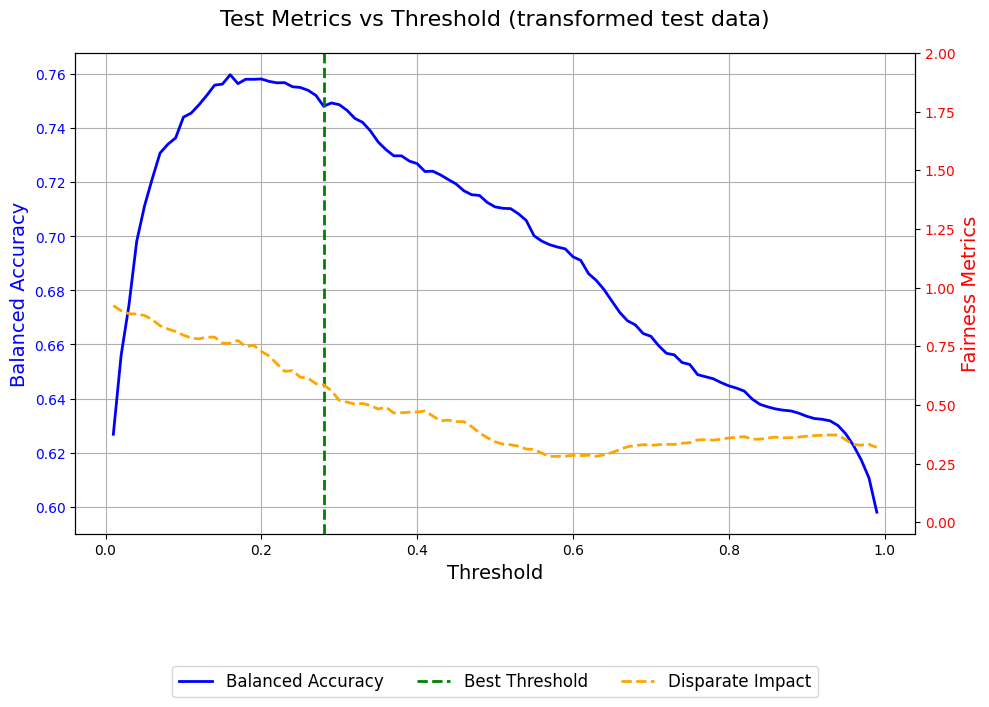

In [14]:
plot_metrics_dir(test_transf, test_transf_scores, best_threshold, unprivileged_groups, privileged_groups)

In [15]:
fairness_metrics, validation_metrics, test_metrics = extract_fairness_metrics(
    train_before_stat_parity_diff, train_after_stat_parity_diff,
    test_before_stat_parity_diff, test_after_stat_parity_diff,
    train_before_disp_impact, train_after_disp_impact,
    test_before_disp_impact, test_after_disp_impact,
    best_threshold, best_balanced_acc,
    test_metrics, test_transf_metrics
)

# Displaying the tables
for table in [fairness_metrics, validation_metrics, test_metrics]:
    display(table.name)
    display(table)


'Fairness Metrics Before and After Transformation'

,Dataset,Stage,Metric,Value
0,Train,Before Transformation,Statistical Parity Difference,-0.1951
1,Train,After Transformation,Statistical Parity Difference,-0.1951
2,Test,Before Transformation,Statistical Parity Difference,-0.1893
3,Test,After Transformation,Statistical Parity Difference,-0.1893
4,Train,Before Transformation,Disparate Impact,0.3572
5,Train,After Transformation,Disparate Impact,0.3572
6,Test,Before Transformation,Disparate Impact,0.3812
7,Test,After Transformation,Disparate Impact,0.3812


'Validation Metrics for Threshold Selection'

,Dataset,Stage,Metric,Value
0,Validation,Best Threshold (Validation),Threshold,0.280000
1,Validation,Best Threshold (Validation),Balanced Accuracy,0.797379


'Test Metrics After Applying Threshold On Original and Transformed'

,Dataset,Stage,Metric,Value
0,Test (Original),After Threshold,Balanced Accuracy,0.777403
1,Test (Transformed),After Threshold,Balanced Accuracy,0.748172
2,Test (Original),After Threshold,Statistical Parity Difference,-0.365472
3,Test (Transformed),After Threshold,Statistical Parity Difference,-0.126479
4,Test (Original),After Threshold,Disparate Impact,0.175115
5,Test (Transformed),After Threshold,Disparate Impact,0.585384
6,Test (Original),After Threshold,Average Odds Difference,-0.317901
7,Test (Transformed),After Threshold,Average Odds Difference,-0.037933
8,Test (Original),After Threshold,Equal Opportunity Difference,-0.383793
9,Test (Transformed),After Threshold,Equal Opportunity Difference,-0.043609
